In [1]:
import numpy as np
import matplotlib.pyplot as plt

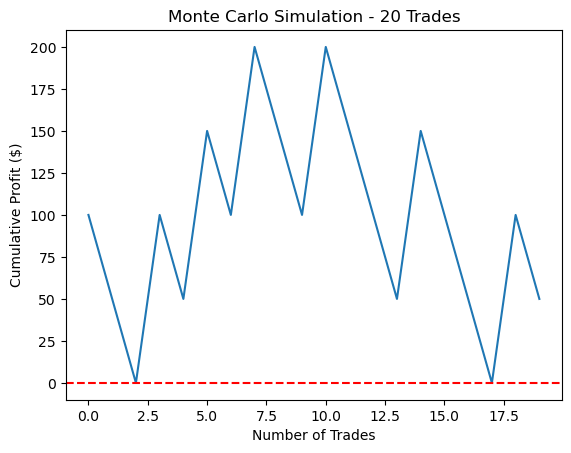

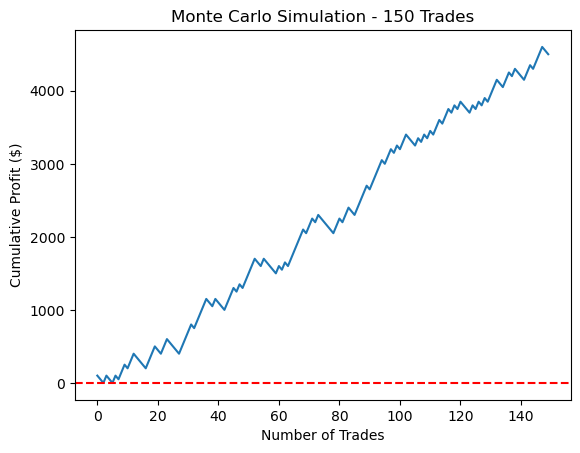

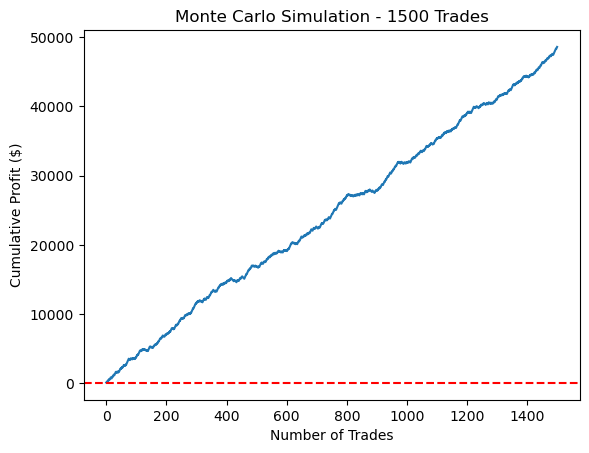

In [15]:
# Monte Carlo Simulation
# Example Problem:
# A trader has a certain strategy with:
# 55% chance to win 100$ per trade taken
# 45% chance to lose $50 per trade taken
# How will his equity curves look like if he takes 20, 150, 1500 trades?

def monte_carlo_trades(n_trades):
    """
    Simulate a sequence of trades and plot cumulative PnL.
    """
    p_win = 0.55
    gain = 100
    loss = 50 
    
    # Simulate trades: 1 = win, 0 = loss
    results = np.random.binomial(1, p_win, n_trades)
    profits = np.where(results == 1, gain, -loss)
    
    # Cumulative PnL
    cumulative_pnl = np.cumsum(profits)
    
    # Plot
    plt.plot(cumulative_pnl)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Number of Trades')
    plt.ylabel('Cumulative Profit ($)')
    plt.title(f'Monte Carlo Simulation - {n_trades} Trades')
    plt.show()
    

monte_carlo_trades(20)
monte_carlo_trades(150)
monte_carlo_trades(1500)

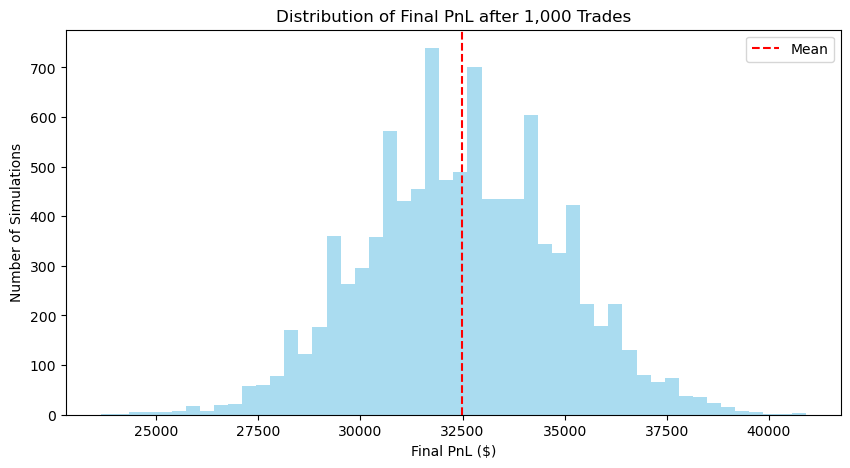

In [20]:
# Multiple Simulations (and their distributions of outcomes)
# The more we deviate from the center (mean), the less probable the final PnL outcome is

n_simulations = 10000
final_pnls = []

for _ in range(n_simulations):
    results = np.random.binomial(1, p_win, n_trades)
    profits = np.where(results == 1, gain, -loss)
    final_pnls.append(np.sum(profits))

plt.figure(figsize=(10,5))
plt.hist(final_pnls, bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Final PnL ($)')
plt.ylabel('Number of Simulations')
plt.title('Distribution of Final PnL after 1,000 Trades')
plt.axvline(np.mean(final_pnls), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()